# 1. Load Libraries and Dataset

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("personality_dataset.csv")

# 2. Initial Data Inspection and Class Balance

In [5]:
print("Class distribution:")
print(df['Personality'].value_counts(normalize=True) * 100)


Class distribution:
Personality
Extrovert    51.413793
Introvert    48.586207
Name: proportion, dtype: float64


# 3. Handle Missing Values

In [8]:
num_cols = df.select_dtypes(include=['float64']).columns
cat_cols = ['Stage_fear', 'Drained_after_socializing']

num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

#  4. Encode Categorical Features

In [11]:
label_encoders = {}
for col in cat_cols + ['Personality']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


#  5. Feature Scaling and Data Split

In [14]:
X = df.drop('Personality', axis=1)
y = df['Personality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 6. Random Forest Classifier

Random Forest Accuracy: 0.9241


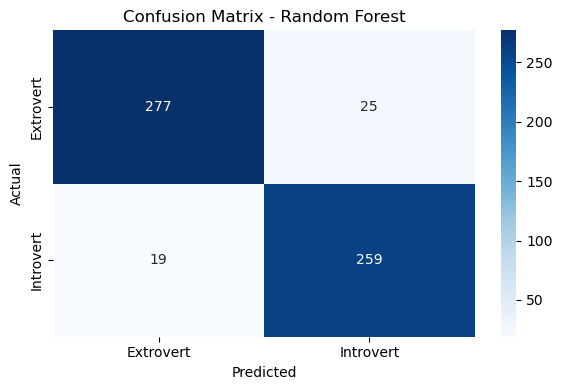

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_score:.4f}")

rf_preds = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['Personality'].classes_,
            yticklabels=label_encoders['Personality'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

#  7. Logistic Regression Classifier

Logistic Regression Accuracy: 0.9190


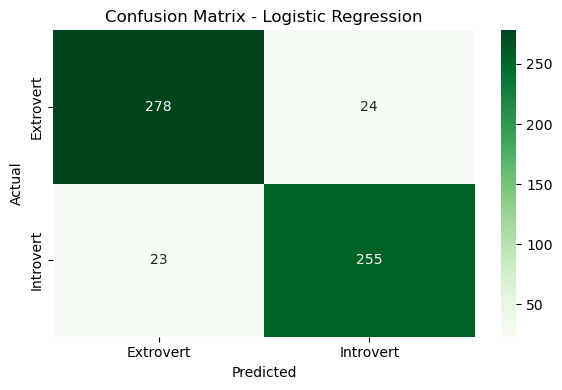

In [28]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {lr_score:.4f}")

lr_preds = lr_model.predict(X_test)

cm_lr = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoders['Personality'].classes_,
            yticklabels=label_encoders['Personality'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

 # 8. ANN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_oh, epochs=50, batch_size=32, validation_data=(X_test, y_test_oh))

loss, accuracy = model.evaluate(X_test, y_test_oh)
print(f"ANN Accuracy (Keras): {accuracy:.4f}")

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8407 - loss: 0.4218 - val_accuracy: 0.9293 - val_loss: 0.2645
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9330 - loss: 0.2567 - val_accuracy: 0.9293 - val_loss: 0.2555
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9347 - loss: 0.2398 - val_accuracy: 0.9293 - val_loss: 0.2560
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9356 - loss: 0.2313 - val_accuracy: 0.9293 - val_loss: 0.2525
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9282 - loss: 0.2455 - val_accuracy: 0.9293 - val_loss: 0.2517
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9390 - loss: 0.2187 - val_accuracy: 0.9293 - val_loss: 0.2462
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9417 - loss: 0.2033 - val_accuracy: 0.9293 - val_loss: 0.2455
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9193 - loss: 0.2596 - val_accuracy: 0.9293 - val_loss

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


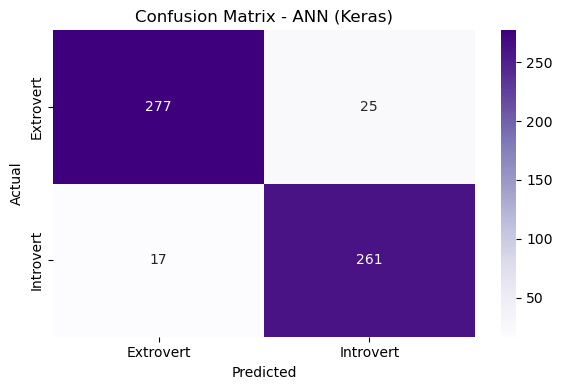

In [41]:
import numpy as np
ann_probs = model.predict(X_test)

ann_preds_keras = np.argmax(ann_probs, axis=1)

cm_keras_ann = confusion_matrix(y_test, ann_preds_keras)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_keras_ann, annot=True, fmt='d', cmap='Purples',
            xticklabels=label_encoders['Personality'].classes_,
            yticklabels=label_encoders['Personality'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN (Keras)')
plt.tight_layout()
plt.show()